In [1]:
# importando librerias
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


2. Keypoints using MP Holistic


In [2]:
mp_holistic = mp.solutions.holistic #Modelo Holistico
mp_drawing = mp.solutions.drawing_utils # Draw utilities dibuja puntos en la cada

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results


In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

Este funciona

In [5]:
import cv2
import mediapipe as mp

# Inicializar MediaPipe Drawing y Holistic
mp_holistic = mp.solutions.holistic  # Modelo Holístico
mp_drawing = mp.solutions.drawing_utils  # Herramientas para dibujar puntos

def mediapipe_detection(image, model):
    # Convertir la imagen de BGR a RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # La imagen ya no es modificable
    image.flags.writeable = False

    # Realizar la predicción
    results = model.process(image)

    # Volver a hacer la imagen modificable
    image.flags.writeable = True

    # Convertir la imagen de vuelta a BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    return image, results


def draw_landmarks(image, results):
    # Dibujar los landmarks de la cara
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)

    # Dibujar los landmarks del cuerpo (pose)
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

    # Dibujar los landmarks de la mano izquierda
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

    # Dibujar los landmarks de la mano derecha
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

    return image


No funciona

In [6]:

# def draw_styled_landmarks(image, results):
#     # Draw face connections
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS,
#                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
#                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
#                              )
#     # Draw pose connections
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
#                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
#                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                              )
#     # Draw left hand connections
#     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
#                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
#                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
#                              )
#     # Draw right hand connections
#     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
#                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
#                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
#                              )

##Funciona

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections (use FACEMESH_TESSELATION for face)
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.face_landmarks,
            mp_holistic.FACEMESH_TESSELATION,  # Updated connection attribute
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )

    # Draw pose connections
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )

    # Draw left hand connections
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.left_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )

    # Draw right hand connections
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.right_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )

    return image, results


In [8]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
if results.left_hand_landmarks:
    # Si los landmarks de la mano izquierda están disponibles
    print(f'Número de puntos de la mano izquierda: {len(results.left_hand_landmarks.landmark)}')
else:
    print('No se detectaron landmarks para la mano izquierda.')


No se detectaron landmarks para la mano izquierda.


In [10]:
# Acceso a los landmarks de la cara, cuerpo, manos
if results.face_landmarks:
    print(f"Landmarks de la cara: {len(results.face_landmarks.landmark)}")
else:
    print("No se detectaron landmarks para la cara.")

if results.pose_landmarks:
    print(f"Landmarks del cuerpo: {len(results.pose_landmarks.landmark)}")
else:
    print("No se detectaron landmarks para el cuerpo.")

if results.left_hand_landmarks:
    print(f"Landmarks de la mano izquierda: {len(results.left_hand_landmarks.landmark)}")
else:
    print("No se detectaron landmarks para la mano izquierda.")

if results.right_hand_landmarks:
    print(f"Landmarks de la mano derecha: {len(results.right_hand_landmarks.landmark)}")
else:
    print("No se detectaron landmarks para la mano derecha.")


Landmarks de la cara: 468
Landmarks del cuerpo: 33
No se detectaron landmarks para la mano izquierda.
No se detectaron landmarks para la mano derecha.


In [11]:
print(results)

<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [12]:
draw_styled_landmarks(frame, results)

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 mediapipe.python.solution_base.SolutionOutputs)

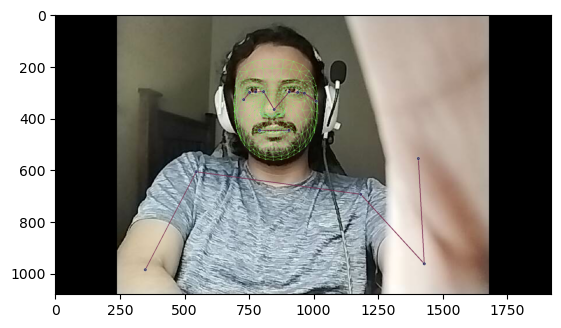

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

3. Extract Keypoint Values


In [14]:
results.pose_landmarks.landmark[0].visibility

0.9999204874038696

In [15]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [16]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [17]:
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()
#     if results.face_landmarks
#     else np.zeros(1404)

In [18]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [19]:
face

array([ 0.4381429 ,  0.40253204, -0.02199077, ...,  0.49618962,
        0.26972404,  0.00765256])

In [20]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [21]:
result_test = extract_keypoints(results)

In [22]:
result_test

array([ 0.4420065 ,  0.34121373, -0.52839559, ...,  0.        ,
        0.        ,  0.        ])

In [23]:
np.save('0', result_test)

In [24]:
np.load('0.npy')

array([ 0.4420065 ,  0.34121373, -0.52839559, ...,  0.        ,
        0.        ,  0.        ])

4. Setup Folders for Collection


In [25]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['ayer', 'hoy', 'mañana', 'ayuda'])

# Thirty videos worth of data
no_sequences = 10

# Videos are going to be 30 frames in length
sequence_length = 10

In [26]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

5. Collect Keypoint Values for Training and Testing

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)

                if frame_num == 0:
                    text = 'COMIENZA'
                    font = cv2.FONT_HERSHEY_SIMPLEX
                    font_scale = 3 
                    thickness = 6
                    color = (0, 255, 0)
                    (text_width, text_height), baseline = cv2.getTextSize(text, font, font_scale, thickness)
                    center_x = image.shape[1] // 2 - text_width // 2
                    center_y = image.shape[0] // 2 + text_height // 2
                    cv2.putText(image, text, (center_x, center_y), font, font_scale, color, thickness, cv2.LINE_AA)

                    recolecta_text = f'Recolectando datos {action} fotograma numero {sequence}'
                    font_scale2 = 1.2  
                    thickness2 = 3
                    color2 = (255, 0, 0)
                    cv2.putText(image, recolecta_text, (30, 50), font, font_scale2, color2, thickness2, cv2.LINE_AA)

                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else:
                    recolecta_text = f'Recolectando datos {action} fotograma numero {sequence}'
                    font = cv2.FONT_HERSHEY_SIMPLEX
                    font_scale2 = 1.2  # letra mediana
                    thickness2 = 3
                    color2 = (255, 0, 0)
                    cv2.putText(image, recolecta_text, (30, 50), font, font_scale2, color2, thickness2, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)

                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()


KeyboardInterrupt: 

: 

In [ ]:
cap.release()
cv2.destroyAllWindows()

6. Preprocess Data and Create Labels and Features


In [ ]:
label_map = {label:num for num, label in enumerate(actions)}

In [ ]:
label_map

{'ayer': 0, 'hoy': 1, 'mañana': 2, 'ayuda': 3}

In [ ]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [ ]:
np.array(sequences).shape

(120, 30, 1662)

In [ ]:
np.array(labels).shape

(120,)

In [ ]:
X = np.array(sequences)

In [ ]:
y = to_categorical(labels).astype(int)

In [ ]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [ ]:
y_test.shape

(6, 4)

7. Build and Train LSTM Neural Network


In [ ]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
"""
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
"""

c:\Users\METIC\anaconda3\envs\LSMenv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30, 1662)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(32, return_sequences=False, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(4, activation='softmax'))  #4 clases


c:\Users\METIC\anaconda3\envs\LSMenv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
res = [.6, 0.2, 0.1,0.1]

In [ ]:
actions[np.argmax(res)]

'ayer'

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

opt = Adam(learning_rate=0.00005)  # más alto, ideal para datos pocos
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=500, batch_size=16, 
                    validation_split=0.2, callbacks=[early_stop])


Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - categorical_accuracy: 0.2425 - loss: 2.0818 - val_categorical_accuracy: 0.2609 - val_loss: 1.4314
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3653 - loss: 1.7350 - val_categorical_accuracy: 0.2609 - val_loss: 1.4347
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 0.3338 - loss: 1.4929 - val_categorical_accuracy: 0.2609 - val_loss: 1.4189
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3830 - loss: 1.3599 - val_categorical_accuracy: 0.2609 - val_loss: 1.3917
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.5437 - loss: 1.0572 - val_categorical_accuracy: 0.2609 - val_loss: 1.3698
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 0.5775 - loss: 0.9950 - val_categorical_accuracy: 0.2609 - val_loss: 1.3542
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 0.4904 - loss: 1.0422 - va

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                  │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 30, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 456,100 (1.74 MB)

 Trainable params: 455,908 (1.74 MB)

 Non-trainable params: 192 (768.00 B)

8. Make Predictions


In [ ]:

res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [ ]:
print(res)
print(res.shape)

[[3.7170049e-02 9.1816920e-01 1.0060025e-02 3.4600668e-02]
 [1.0547232e-02 8.9017993e-01 8.6586013e-02 1.2686835e-02]
 [3.2897364e-02 7.8988272e-01 8.8315822e-02 8.8904142e-02]
 [6.4094842e-04 4.6852577e-04 3.1259665e-04 9.9857795e-01]
 [6.4574368e-02 8.5624200e-01 2.8981501e-02 5.0202128e-02]
 [9.7500902e-01 3.3570218e-03 2.9650235e-03 1.8668937e-02]]
(6, 4)


In [ ]:
actions[np.argmax(res[2])] ##originalmente era 4

'hoy'

In [ ]:
actions[np.argmax(y_test[2])]

'hoy'

9. Save Weights


In [ ]:
model.save('action.h5')

In [ ]:
del model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30, 1662)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(32, return_sequences=False, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(4, activation='softmax')) 

c:\Users\METIC\anaconda3\envs\LSMenv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

opt = Adam(learning_rate=0.00005)  # más alto, ideal para datos pocos
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.load_weights('action.h5')

10. Evaluation using Confusion Matrix and Accuracy


In [ ]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[5, 0],
        [0, 1]],

       [[2, 0],
        [0, 4]],

       [[5, 0],
        [0, 1]]], dtype=int64)

In [ ]:
accuracy_score(ytrue, yhat)

1.0

11. Test in Real Time


In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

    return output_frame

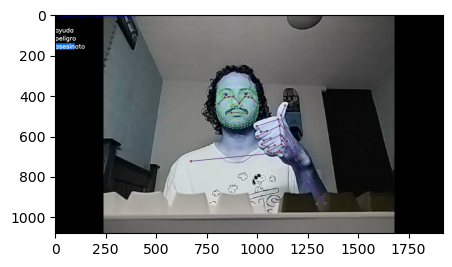

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(prob_viz(res[-1], actions, image, colors))  # usa la última predicción

In [ ]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [ ]:
sequence.append('def')

AttributeError: 'int' object has no attribute 'append'

In [ ]:
sequence.reverse()

In [ ]:

sequence[-30:]

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.99

cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])


        #3. Viz logic
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30),
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
(num_sequences,30,1662)

In [ ]:

model.predict(np.expand_dims(X_test[0], axis=0))

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.99

cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            action = actions[np.argmax(res)]
            confidence = res[np.argmax(res)]  # Probabilidad de la predicción

            print(f"Predicción: {action}, Confianza: {confidence:.2%}")

            # Mostrar el texto en pantalla con el % de probabilidad
            cv2.putText(image, f"{action}: {confidence:.2%}", (10, 80),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

            #3. Viz logic
            if confidence > threshold:
                if len(sentence) > 0:
                    if action != sentence[-1]:
                        sentence.append(action)
                else:
                    sentence.append(action)

            if len(sentence) > 5:
                sentence = sentence[-5:]

        # Mostrar la frase detectada
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


In [ ]:
# Inicializar modelos de Mediapipe
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands  # Modelo específico para manos

sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    with mp_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5) as hands:
        while cap.isOpened():
            ret, frame = cap.read()
            image, results = mediapipe_detection(frame, holistic)

            # Detectar las manos
            rgb_image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            hand_results = hands.process(rgb_image)

            # Dibujar landmarks del cuerpo
            draw_styled_landmarks(image, results)

            # Obtener keypoints de la detección
            keypoints = extract_keypoints(results)
            sequence.append(keypoints)
            sequence = sequence[-30:]

            if len(sequence) == 30:
                res = model.predict(np.expand_dims(sequence, axis=0))[0]
                action = actions[np.argmax(res)]
                confidence = res[np.argmax(res)]

                print(f"Predicción: {action}, Confianza: {confidence:.2%}")

                # Dibujar recuadro en la(s) mano(s)
                if hand_results.multi_hand_landmarks:
                    for hand_landmarks in hand_results.multi_hand_landmarks:
                        x_min = min([lm.x for lm in hand_landmarks.landmark])
                        y_min = min([lm.y for lm in hand_landmarks.landmark])
                        x_max = max([lm.x for lm in hand_landmarks.landmark])
                        y_max = max([lm.y for lm in hand_landmarks.landmark])

                        # Convertir coordenadas normalizadas a píxeles
                        h, w, _ = image.shape
                        x_min, y_min, x_max, y_max = int(x_min * w), int(y_min * h), int(x_max * w), int(y_max * h)

                        # Dibujar rectángulo alrededor de la mano
                        cv2.rectangle(image, (x_min - 10, y_min - 10), (x_max + 10, y_max + 10), (0, 255, 0), 2)

                        # Mostrar la palabra dentro del recuadro
                        cv2.putText(image, f"{action}: {confidence:.2%}", (x_min, y_min - 10),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv2.LINE_AA)

                # 3. Lógica de visualización de palabras
                if confidence > threshold:
                    if len(sentence) > 0:
                        if action != sentence[-1]:
                            sentence.append(action)
                    else:
                        sentence.append(action)

                if len(sentence) > 5:
                    sentence = sentence[-5:]

            # Mostrar la frase detectada
            cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, ' '.join(sentence), (3,30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

            # Mostrar imagen en pantalla
            cv2.imshow('OpenCV Feed', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

cap.release()
cv2.destroyAllWindows()
